In [8]:
from bs4 import BeautifulSoup

# Step 1: Open the HTML file
with open('post_comments_1.html', 'r', encoding='utf-8') as file:
    html_content = file.read()

# Step 2: Parse the HTML content with BeautifulSoup
soup = BeautifulSoup(html_content, 'lxml')

# Step 3: Find all the comment blocks
comments = soup.find_all('div', class_='pam _3-95 _2ph- _a6-g uiBoxWhite noborder')

# Step 4: Loop through each comment block and extract the details
comments_data = []
for comment in comments:
    # Extract comment text
    comment_text = comment.find('td', class_='_2pin _a6_q').find_next('div').text.strip()
    
    # Extract media owner name
    media_owner = comment.find('td', class_='_2pin _a6_q').find_next('div').find_next('div').text.strip()
    
    # Extract time
    time_text = comment.find_all('td', class_='_2pin _a6_q')[1].find_next('td').text.strip()

    # Add extracted data to list
    comments_data.append({
        'Comment': comment_text,
        'Media Owner': media_owner,
        'Time': time_text
    })

# Step 5: Print or use the extracted comments data
for comment in comments_data[:5]:
    print(comment)


{'Comment': 'My BEST FRIEND FOREVER 🎀', 'Media Owner': 'My BEST FRIEND FOREVER 🎀', 'Time': 'Time'}
{'Comment': '🐞', 'Media Owner': '🐞', 'Time': 'Time'}
{'Comment': 'Yll ✨', 'Media Owner': 'Yll ✨', 'Time': 'Time'}
{'Comment': 'Kush te dha leje te jesh kaq HOT?', 'Media Owner': 'Kush te dha leje te jesh kaq HOT?', 'Time': 'Time'}
{'Comment': 'Excuse u?', 'Media Owner': 'Excuse u?', 'Time': 'Time'}


                                  Comment  \
0                My BEST FRIEND FOREVER 🎀   
1                                       🐞   
2                                   Yll ✨   
3       Kush te dha leje te jesh kaq HOT?   
4                               Excuse u?   
..                                    ...   
177                                  ❤️❤️   
178                                  ❤️❤️   
179                           Twinii 🌍🥺❤️   
180  Alexa play “Anna” by Nora Istrefi 🙈😝   
181                           Princess ❤️   

                              Media Owner                   Time sentiment  
0                My BEST FRIEND FOREVER 🎀                   Time  Positive  
1                                       🐞                   Time   Neutral  
2                                   Yll ✨                   Time   Neutral  
3       Kush te dha leje te jesh kaq HOT?                   Time  Positive  
4                               Excuse u?                   Time  Negative

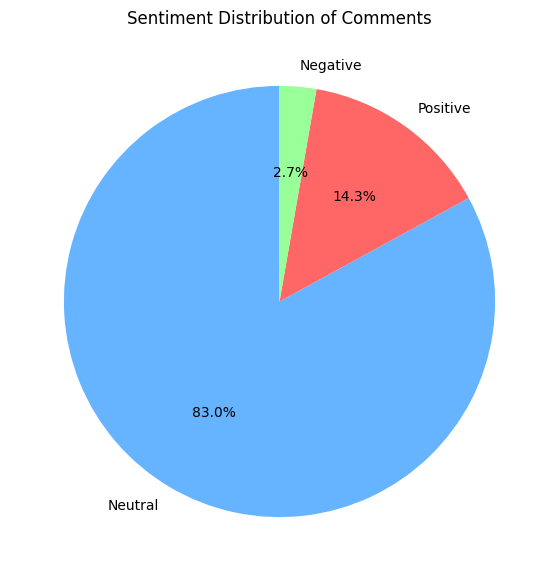

In [9]:
# Import necessary libraries
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt


# Convert list of comments into a DataFrame
df = pd.DataFrame(comments_data)

# Function to get sentiment polarity
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply sentiment analysis to the 'Comment' column
df['sentiment_polarity'] = df['Comment'].apply(get_sentiment)

# Classify sentiment into Positive, Negative, or Neutral
def sentiment_label(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['sentiment_polarity'].apply(sentiment_label)

# Display the results
print(df[['Comment', 'Media Owner', 'Time', 'sentiment']])

# Visualization: Plotting the distribution of sentiments
sentiment_counts = df['sentiment'].value_counts()

plt.figure(figsize=(7, 7))
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff6666', '#99ff99'])
plt.title('Sentiment Distribution of Comments')
plt.ylabel('')  # Hide the y-label
plt.show()
